# Import all the library

In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Function that convert message stream into binary stream

In [2]:
def messageToBinary(msg):
    if (type(msg) == str):
        return ''.join([format(ord(i), "08b") for i in msg])
    elif (type(msg) == bytes or type(msg) == np.ndarray):
        return [format(i, "08b") for i in msg]
    elif (type(msg) == int or type(msg) == np.uint8):
        return format(msg, "08b")
    else:
        raise TypeError("Please give valid message")

# Function that encode the message into cover audio


In [3]:
'''
    This function encode the message in the audio frame
'''
def encode(path, secretmessage):
    print ("Encoding......")
    # Read audio file as read mode
    audio = wave.open(path, "rb")
    
    # Extract audio frame as byte array
    frame_bytes = bytearray(list(audio.readframes(audio.getnframes())))
    
    # Append Delimeter
    secretmessage += "####"
    
    # Convert message into binary string
    secretmessage_bits = messageToBinary(secretmessage)
    
    # check given message is encoded in cover audio or not
    n_frameCount = 0
    for i in range(len(frame_bytes)):
        if (frame_bytes[i] > 100):
            n_frameCount += 1
            
    if (len(secretmessage_bits) <= n_frameCount):
        pass
    else:
        raise ValueError("Secret message is overflow please give less amount of data or a bigger audio file")
    
    # encode the message in audio frame
    data_index = 0
    for i in range(len(frame_bytes)):
        if (frame_bytes[i] > 100):
            if (data_index < len(secretmessage_bits)):
                frame_bytes[i] = (frame_bytes[i]&254) | int(secretmessage_bits[data_index],2)
                data_index += 1
            else:
                break
    modified_frame_bytes = bytes(frame_bytes)
    
    # Create new audio wav file set all the parameter as given given audio file
    # and set modified frames
    file_name, file_type = path.split('.')
    new_filename = file_name+"_stego."+file_type
    newaudio = wave.open(new_filename, "wb")
    newaudio.setparams(audio.getparams())
    newaudio.writeframes(modified_frame_bytes)
    
    #clise all the audio file
    newaudio.close()
    audio.close()
    
    print ("Encoding Successfullty!!!")
    print (f'File saved as : {new_filename}')
    return new_filename

# Function that extract the message from stego audio

In [5]:
def decode(path):
    print("Decoding....")
    
    # read stego audio file
    audio = wave.open(path, "rb")
    
    # Extract audio frame as byte array
    frame_bytes = bytearray(list(audio.readframes(audio.getnframes())))
    
    # extract last bit in audio frame
    extract_bit = ""
    for i in range(len(frame_bytes)):
        if (frame_bytes[i] > 100):
            extract_bit += str(frame_bytes[i]&1)
        
    # covert this bit into 8 bits of chunks
    extracted_byte = list(extract_bit[i:i+8] for i in range(0,len(extract_bit),8))
    
    # Decode message
    decode_messgae =""
    for byte in extracted_byte:
        decode_messgae += chr(int(byte,2))
        if (decode_messgae[-4:] == '####'):
            break
    print ("Successful !!")
    return decode_messgae[:-4]

# Main Function

In [7]:
if __name__ == "__main__":
    while(1):
        val = int(input("\nSelect an option: \n1)Encode\n2)Decode\n3)exit\nChoice:"))
        if val == 1:
            path = input("Please give path of cover audio file : ")
            message = input("Enter the Message you want to hide : ")
            encode(path, message)
        elif val == 2:
            path = input("Please give path of stego audio file : ")
            print (f'Decoded message are : {decode(path)}')
        elif val == 3:
            break
        else:
            print("\nEnter valid Choice!")


Select an option: 
1)Encode
2)Decode
3)exit
Choice:1
Please give path of cover audio file : cover_audio.wav
Enter the Message you want to hide : This is top secret message
Encoding......
Encoding Successfullty!!!
File saved as : cover_audio_stego.wav

Select an option: 
1)Encode
2)Decode
3)exit
Choice:2
Please give path of stego audio file : cover_audio_stego.wav
Decoding....
Successful !!
Decoded message are : This is top secret message

Select an option: 
1)Encode
2)Decode
3)exit
Choice:4

Enter valid Choice!

Select an option: 
1)Encode
2)Decode
3)exit
Choice:3


# Visualize the original and stego audio file 

C:\Users\voilentKiller0\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.
C:\Users\voilentKiller0\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.
C:\Users\voilentKiller0\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if __name__ == '__main__':
C:\Users\voilentKiller0\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


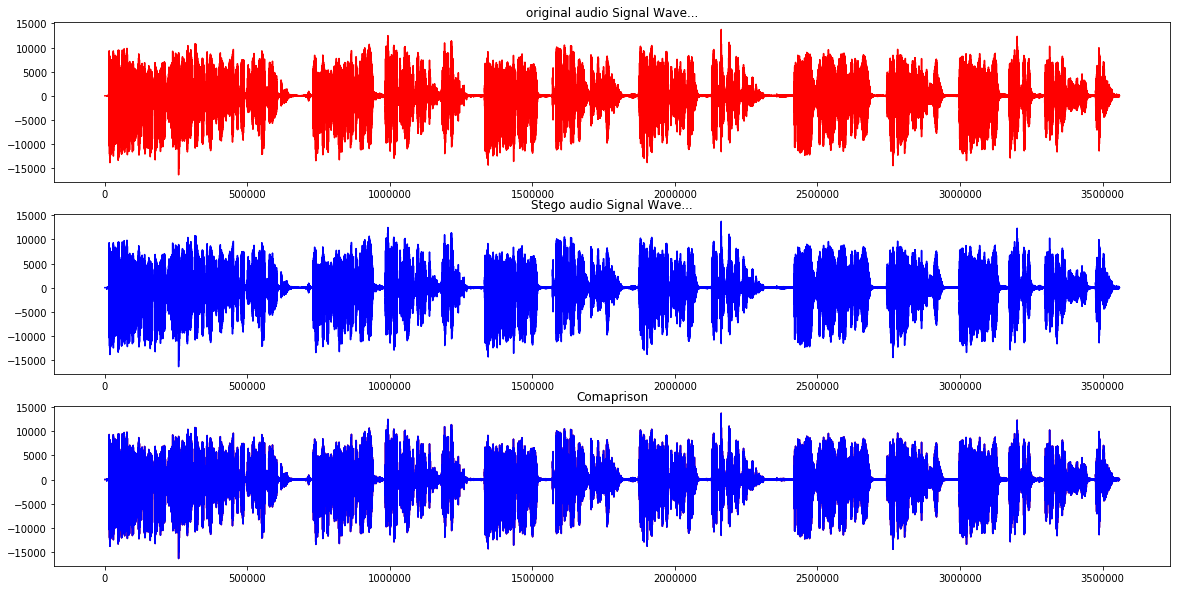

In [8]:
audio1 = wave.open("cover_audio.wav", "r")

signal1 = audio1.readframes(-1)
signal1 = np.fromstring(signal1, "Int16")

audio2 = wave.open("cover_audio_stego.wav", "r")

signal2 = audio2.readframes(-1)
signal2 = np.fromstring(signal2, "Int16")

plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(signal1,'r')
plt.title("original audio Signal Wave...")
plt.subplot(3,1,2)
plt.plot(signal2,'b')
plt.title("Stego audio Signal Wave...")
plt.subplot(3,1,3)
plt.plot(signal1,'r')
plt.plot(signal2,'b')
plt.title("Comaprison")
plt.show()